In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from model import VAE
import h5py
from ipywidgets import interact, FloatSlider


/Users/Yonk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def sample_z(z_mean, z_log_sigma_sq):
        eps_shape = z_mean.shape
        eps = np.random.normal(0, 1, eps_shape)
        z = np.sqrt(np.exp(z_log_sigma_sq)) * eps + z_mean
        return z


In [3]:
sess = tf.Session()

model = VAE(
    input_width=128,
    input_height=128,
    input_channels=3,
    gamma=1000,
    capacity_limit=1000,
    capacity_change_duration=100000,
    learning_rate=5e-4,
)

sess.run(tf.global_variables_initializer())

checkpoint_path = 'checkpoints/'
saver = tf.train.Saver()
checkpoint = tf.train.get_checkpoint_state(checkpoint_path)
if checkpoint and checkpoint.model_checkpoint_path:
    saver.restore(sess, checkpoint.model_checkpoint_path)
    print("loaded checkpoint: {0}".format(checkpoint.model_checkpoint_path))
else:
    print("Could not find old checkpoint")


    

INFO:tensorflow:Restoring parameters from checkpoints/checkpoint-852000
loaded checkpoint: checkpoints/checkpoint-852000


In [4]:
def build_interactive_z(z_vec, only_display_these_idx = None): # only_display_these_idx: Only display certain idx
    z_dict = {}
    _max = np.max(z_vec)
    _min = np.min(z_vec)
    for idx, _z in enumerate(z_vec[0]):
        if (only_display_these_idx is not None) and idx not in only_display_these_idx: # Optional
            continue
        z_dict['%d' % idx] = FloatSlider(min=_min, max=_max, value=_z, step=0.01, description='z%d' % idx)
        
    return z_dict

## Visualize VAE

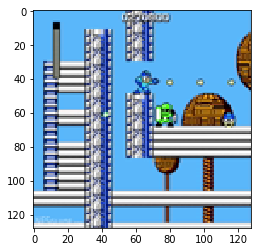

In [17]:
dataset_zip = h5py.File('data/megaman.hdf5', 'r')
imgs       = dataset_zip['megaman']
idx = np.random.randint(imgs.shape[0])
#img = np.random.choice(imgs)
img = imgs[idx]

plt.imshow(img)
plt.show()

In [23]:
def z_interact(*args, **kwargs):  # Event handler for interactive sliders
    for key, value in kwargs.items():
        idx = int(key)
        z[0, idx] = value
        
    # Interactively draw output
    out = model.generate(sess, z)
    out_img = out.reshape([128, 128, 3])
    plt.imshow(out_img)
    plt.show()
    
img_flat = img.reshape([1, 49152])
z_mean, z_log_sigma_sq = model.transform(sess, img_flat)
z = sample_z(z_mean, z_log_sigma_sq)
zix = np.argsort(np.exp(z_log_sigma_sq))[0,:10] #np.random.randint(0, z.shape[1], 10) #
print(zix)
z_dict = build_interactive_z(z, only_display_these_idx=zix)
interact(z_interact, **z_dict)



[182 175 108 176 107 223  47  32 140  50]


interactive(children=(FloatSlider(value=0.9259564876482204, description='z32', max=2.6302232637299956, min=-2.…

<function __main__.z_interact(*args, **kwargs)>